Text(0, 0.5, 'lats')

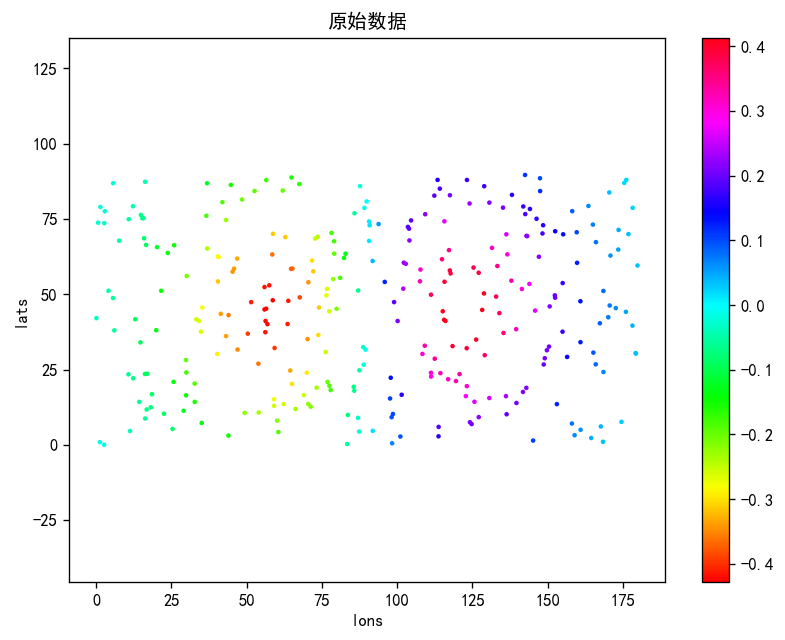

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

lons = np.random.random(300)*180  # 经度从0-180°，随机生成300个点
lats = np.random.random(300)*90   # 纬度从0-90°，随机生成300个点
# 生成300个温度点
temperature = ((lons-90)/45)*np.exp(-((lons-90)/45)**2-((lats-45)/45)**2)



# 将矩形区域裁剪成三角形区域,网格数据变成了离散数据
# triangle = np.where( ( (lons<90)&(lats<lons) )|((lons>=90)&(lats<180-lons)) )
# lons = lons[triangle]
# lats = lats[triangle]
# temperature = temperature[triangle]

# 绘图
fig = plt.figure( figsize=(8,6),dpi=120 )
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.title('原始数据')
plt.scatter( lons, lats, s=3, c=temperature, cmap=plt.cm.hsv )
plt.colorbar()
plt.axis('equal')
plt.xlabel('lons')
plt.ylabel('lats')

In [17]:

# 生成目标网格
lat_grid,lon_grid = np.mgrid[0:90:91j,0:180:181j]

lat_grid

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 2.,  2.,  2., ...,  2.,  2.,  2.],
       ...,
       [88., 88., 88., ..., 88., 88., 88.],
       [89., 89., 89., ..., 89., 89., 89.],
       [90., 90., 90., ..., 90., 90., 90.]])

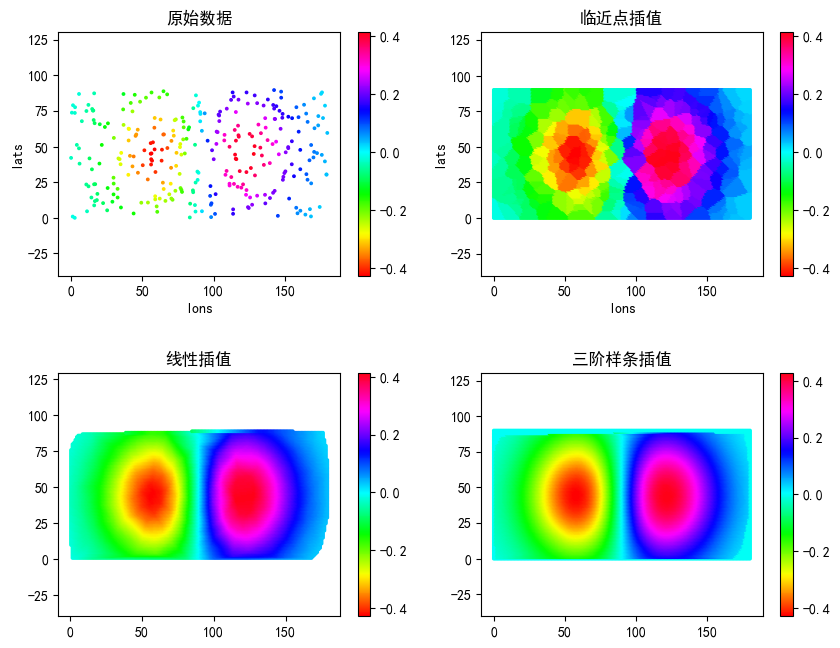

In [18]:
fig = plt.figure( figsize=(10,8),dpi=100)
ax1 = fig.add_subplot(2,2,1)
mappable = ax1.scatter( lons, lats, s=3, c=temperature, cmap=plt.cm.hsv )
ax1.set_title('原始数据')
ax1.set_xlabel('lons')
ax1.set_ylabel('lats')
ax1.axis('equal')
plt.colorbar(mappable, ax=ax1)

# 临近点插值
temp_nearest = griddata((lons,lats), temperature, (lon_grid,lat_grid), method='nearest')
ax2 = fig.add_subplot(2,2,2)
mappable = ax2.scatter( lon_grid, lat_grid, s=3, c=temp_nearest, cmap=plt.cm.hsv )
ax2.set_title('临近点插值')
ax2.set_xlabel('lons')
ax2.set_ylabel('lats')
ax2.axis('equal')
plt.colorbar(mappable, ax=ax2)

# 线性插值
temp_linear = griddata((lons,lats), temperature, (lon_grid,lat_grid), method='linear')
plt.subplot(2,2,3)
plt.scatter( lon_grid, lat_grid, s=3, c=temp_linear, cmap=plt.cm.hsv )
plt.title('线性插值')
plt.colorbar()
plt.axis('equal')

# 三阶样条插值
temp_cubic = griddata((lons,lats), temperature, (lon_grid,lat_grid), method='cubic',fill_value=0)
plt.subplot(2,2,4)
plt.scatter( lon_grid, lat_grid, s=3, c=temp_cubic, cmap=plt.cm.hsv )
plt.title('三阶样条插值')
plt.colorbar()
plt.axis('equal')

plt.subplots_adjust(left=None, bottom=0.15, right=None, top=None, wspace=0.2, hspace=0.4)
plt.show()